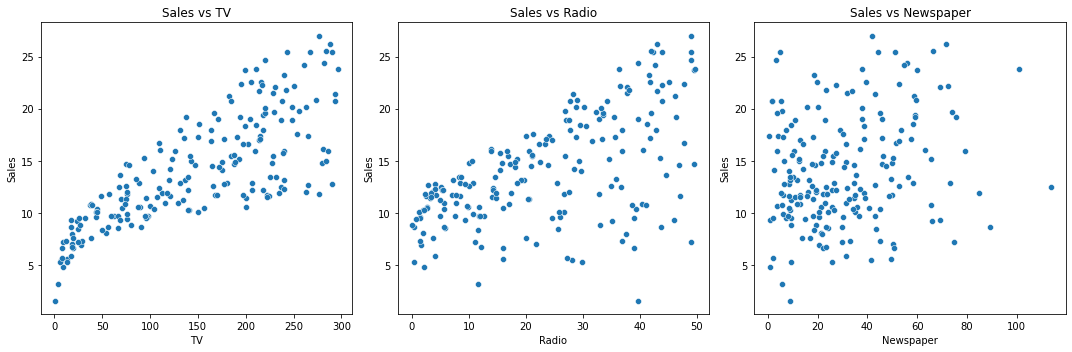

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a DataFrame
df = pd.read_csv("Advertising.csv")

# Visualize the relationship between features and the target variable 'Sales'
features = ['TV', 'Radio', 'Newspaper']
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[feature], y=df['Sales'])
    plt.title(f'Sales vs {feature}')

plt.tight_layout()
plt.show()

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor

# Select the feature and target variable
X = df[['Radio']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grids for each model
param_grids = {
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5]
        }
    },
    'AdaBoost': {
        'model': AdaBoostRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 3, 5]
        }
    }
}

In [3]:
# Store the best models after GridSearchCV
best_models = {}

# Run GridSearchCV for each model
for model_name, config in param_grids.items():
    grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"Best GridSearchCV Score: {-grid_search.best_score_:.4f}\n")

SVR Best Parameters: {'C': 10, 'kernel': 'linear'}
Best GridSearchCV Score: 18.3416

GradientBoosting Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best GridSearchCV Score: 19.2012

AdaBoost Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best GridSearchCV Score: 18.9034

RandomForest Best Parameters: {'max_depth': 3, 'n_estimators': 100}
Best GridSearchCV Score: 18.3123



In [4]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate models and display performance metrics
results = []  # To store results for summary table

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": model_name, "MSE": mse, "R²": r2})
    print(f"{model_name} Performance:")
    print(f"  - Mean Squared Error (MSE): {mse:.4f}")
    print(f"  - R² Score: {r2:.4f}")
    print("  - Interpretation: ")
    if r2 > 0.2:
        print("    Good fit for this dataset (R² > 0.2).\n")
    else:
        print("    Poor fit for this dataset (R² <= 0.2).\n")

SVR Performance:
  - Mean Squared Error (MSE): 25.2668
  - R² Score: 0.1995
  - Interpretation: 
    Poor fit for this dataset (R² <= 0.2).

GradientBoosting Performance:
  - Mean Squared Error (MSE): 24.2454
  - R² Score: 0.2319
  - Interpretation: 
    Good fit for this dataset (R² > 0.2).

AdaBoost Performance:
  - Mean Squared Error (MSE): 24.2426
  - R² Score: 0.2319
  - Interpretation: 
    Good fit for this dataset (R² > 0.2).

RandomForest Performance:
  - Mean Squared Error (MSE): 23.4843
  - R² Score: 0.2560
  - Interpretation: 
    Good fit for this dataset (R² > 0.2).



In [5]:
# Create a summary table for performance metrics
results_df = pd.DataFrame(results)
print("Model Performance Summary:")
print(results_df)

Model Performance Summary:
              Model        MSE        R²
0               SVR  25.266768  0.199496
1  GradientBoosting  24.245415  0.231855
2          AdaBoost  24.242585  0.231945
3      RandomForest  23.484314  0.255968


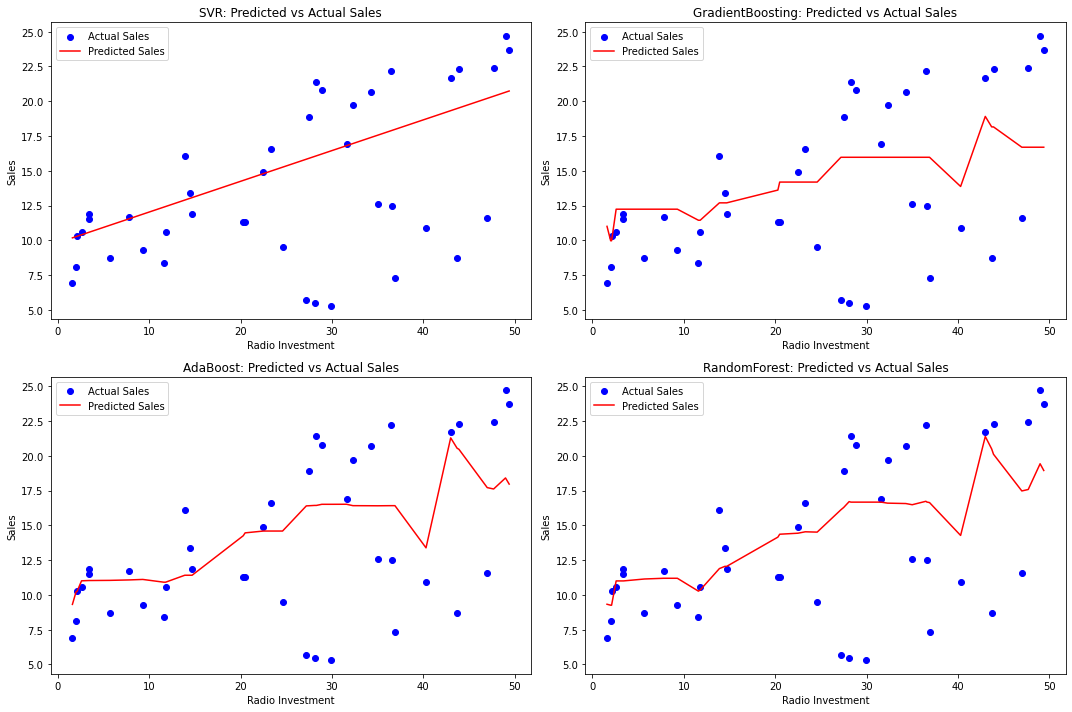

In [6]:
# Predict on the test set and plot results
plt.figure(figsize=(15, 10))

for i, (model_name, model) in enumerate(best_models.items(), 1):
    y_pred = model.predict(X_test)
    sorted_indices = X_test.values.flatten().argsort()  # Sort indices for smooth lines
    plt.subplot(2, 2, i)
    plt.scatter(X_test.values.flatten(), y_test.values, color='blue', label='Actual Sales')
    plt.plot(
        X_test.values.flatten()[sorted_indices], 
        y_pred[sorted_indices], 
        color='red', 
        label='Predicted Sales'
    )
    plt.xlabel('Radio Investment')
    plt.ylabel('Sales')
    plt.title(f'{model_name}: Predicted vs Actual Sales')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()